In [1]:
#What do we want to know from the data?
#-Which river systems have the highest levels of toxins
#-Are there any noticable trends in toxin levels over time?
#-How do pH levels correlate with different toxin concentrations
#-Is there a seasonal pattern to toxin levels?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df= pd.read_csv('C:/Users/benbo/OneDrive/Desktop/Data Analysis Project Examps/2 River Toxin Analysis/National_River_Toxin_Dataset_1.csv')

In [3]:
df

,Date,River_System,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
0,2018-01-01,Amazon,7.030015,19.136212,2.500401,0.465454,3.578886,11.627614,0.522167,7.830196
1,2018-01-01,Nile,7.421766,21.406824,3.469443,0.859716,5.352155,10.538171,0.510465,8.130328
2,2018-01-01,Yangtze,7.133612,18.419902,3.806935,0.824085,5.277814,7.865033,0.585096,8.120874
3,2018-01-01,Mississippi,7.863001,18.014871,3.438131,0.500597,3.473881,11.143068,0.438248,6.853816
4,2018-01-01,Danube,7.527686,16.622289,2.188210,0.424178,2.454209,8.043467,0.422244,8.197925
...,...,...,...,...,...,...,...,...,...,...
1300,2022-12-26,Amazon,NaN,21.760533,1.656464,0.466371,2.778257,8.932392,0.521475,8.789334
1301,2022-12-26,Nile,7.214448,21.005255,1.395876,0.743100,4.243743,7.766917,0.624352,7.907600
1302,2022-12-26,Yangtze,6.852077,18.841392,3.677048,0.634460,5.958020,9.855321,0.567842,10.983113
1303,2022-12-26,Mississippi,7.923046,18.886274,3.229030,0.526015,3.904349,10.859932,0.498410,8.284721


In [4]:
# Data exploration checking the shape of the DataFrame, displaying info and generating descriptive statistics
df.head()

,Date,River_System,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
0,2018-01-01,Amazon,7.030015,19.136212,2.500401,0.465454,3.578886,11.627614,0.522167,7.830196
1,2018-01-01,Nile,7.421766,21.406824,3.469443,0.859716,5.352155,10.538171,0.510465,8.130328
2,2018-01-01,Yangtze,7.133612,18.419902,3.806935,0.824085,5.277814,7.865033,0.585096,8.120874
3,2018-01-01,Mississippi,7.863001,18.014871,3.438131,0.500597,3.473881,11.143068,0.438248,6.853816
4,2018-01-01,Danube,7.527686,16.622289,2.188210,0.424178,2.454209,8.043467,0.422244,8.197925


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1305 non-null   object 
 1   River_System      1305 non-null   object 
 2   pH_Level          1278 non-null   float64
 3   Temperature       1278 non-null   float64
 4   Lead              1285 non-null   float64
 5   Mercury           1278 non-null   float64
 6   Arsenic           1279 non-null   float64
 7   Nitrates          1265 non-null   float64
 8   Phosphates        1282 non-null   float64
 9   Dissolved_Oxygen  1284 non-null   float64
dtypes: float64(8), object(2)
memory usage: 102.1+ KB


In [6]:
df.describe()

,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
count,1278.000000,1278.000000,1285.000000,1278.000000,1279.000000,1265.000000,1282.000000,1284.000000
mean,7.353247,20.041668,3.011035,0.596108,3.597916,10.038789,0.497162,8.023795
std,0.349114,4.063638,0.874431,0.175150,0.992052,2.096641,0.106304,1.064190
min,6.465087,9.891618,0.551349,0.157117,1.485608,2.025075,0.144044,5.041394
25%,7.101324,16.813976,2.366298,0.462683,2.836160,8.701188,0.422006,7.269386
50%,7.339326,20.039121,3.000714,0.599186,3.511678,10.089112,0.497631,8.007448
75%,7.585733,23.358634,3.676560,0.734863,4.298946,11.391686,0.572888,8.740828
max,8.392902,30.749449,5.800963,1.057494,6.232902,16.547073,0.870007,11.228677


In [7]:
#Data cleaning, checking for missing values
print(df.isnull().sum())

Date                 0
River_System         0
pH_Level            27
Temperature         27
Lead                20
Mercury             27
Arsenic             26
Nitrates            40
Phosphates          23
Dissolved_Oxygen    21
dtype: int64


In [8]:
#Handling any missing or inconsistent data
df.dropna(inplace=True)
#Filling missing values in numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [9]:
print(df.isnull().sum())

Date                0
River_System        0
pH_Level            0
Temperature         0
Lead                0
Mercury             0
Arsenic             0
Nitrates            0
Phosphates          0
Dissolved_Oxygen    0
dtype: int64


In [10]:
#Converting date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1106 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1106 non-null   datetime64[ns]
 1   River_System      1106 non-null   object        
 2   pH_Level          1106 non-null   float64       
 3   Temperature       1106 non-null   float64       
 4   Lead              1106 non-null   float64       
 5   Mercury           1106 non-null   float64       
 6   Arsenic           1106 non-null   float64       
 7   Nitrates          1106 non-null   float64       
 8   Phosphates        1106 non-null   float64       
 9   Dissolved_Oxygen  1106 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 95.0+ KB


In [12]:
#Basic Analysis
#Calculation of the average toxin levels for each river system
avarage_toxin_for_rivers = df.groupby('River_System')[['Lead', 'Mercury', 'Arsenic']].mean()
avarage_toxin_for_rivers 

,Lead,Mercury,Arsenic
River_System,,,
Amazon,2.003854,0.495652,3.004700
Danube,2.533596,0.391695,2.496362
Mississippi,3.487375,0.600770,3.492275
Nile,2.976931,0.710474,4.015651
Yangtze,4.035085,0.790756,4.997301


In [13]:
#Identifying the top 5 most polluted river systems
most_polluted_rivers = df.groupby('River_System')[['Lead', 'Mercury', 'Arsenic']].mean()
#Creating a total pollution score to calculate all the pollution affecting the rivers
most_polluted_rivers['Total Pollution'] = most_polluted_rivers.sum(axis=1)
most_polluted_rivers = most_polluted_rivers.sort_values(by='Total Pollution', ascending=False)
most_polluted_rivers

,Lead,Mercury,Arsenic,Total Pollution
River_System,,,,
Yangtze,4.035085,0.790756,4.997301,9.823142
Nile,2.976931,0.710474,4.015651,7.703056
Mississippi,3.487375,0.600770,3.492275,7.580421
Amazon,2.003854,0.495652,3.004700,5.504205
Danube,2.533596,0.391695,2.496362,5.421652


In [33]:
#Analysing the correlation between pH levels and toxin concentrations
correlationlead = df['pH_Level'].corr(df['Lead'])
correlationmercury = df['pH_Level'].corr(df['Mercury'])
correlationarsenic = df['pH_Level'].corr(df['Arsenic'])
print(f" Correlation between pH levels and Lead concentraion: {correlationlead}")
print(f" Correlation between pH levels and Mercury concentraion: {correlationmercury}")
print(f" Correlation between pH levels and Arsenic concentraion: {correlationarsenic}")

 Correlation between pH levels and Lead concentraion: 0.334438271192984
 Correlation between pH levels and Mercury concentraion: 0.1515110466725999
 Correlation between pH levels and Arsenic concentraion: 0.04421783063266866


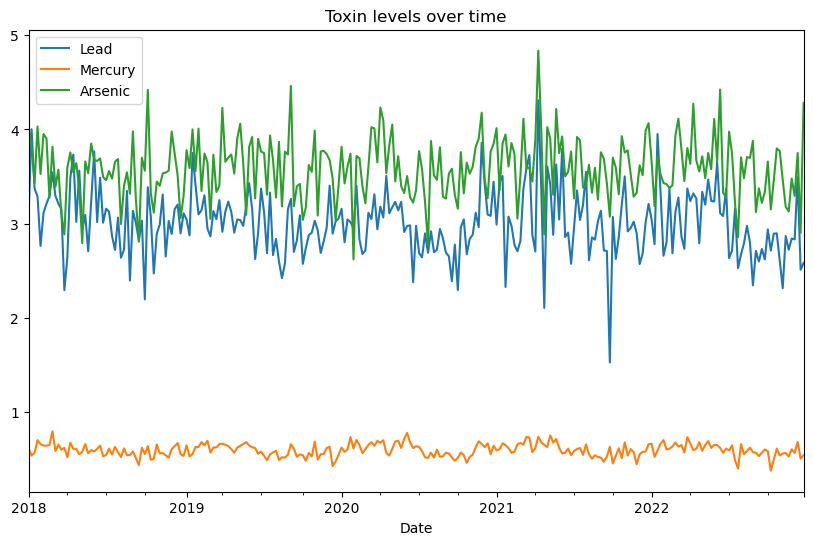

In [51]:
#Examining the trends of toxin levels over time
toxin_levels_overtime = df.groupby('Date')[['Lead', 'Mercury', 'Arsenic']].mean()

toxin_levels_overtime.plot(kind='line', figsize=(10, 6))
plt.title('Toxin levels over time')
plt.show()

<Figure size 1000x600 with 0 Axes>

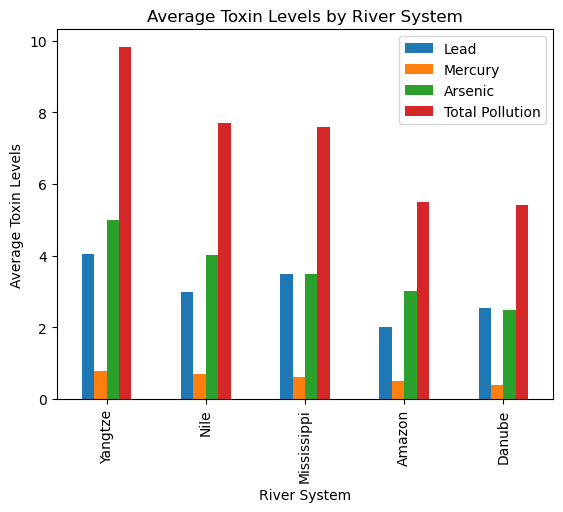

In [14]:
#Data Visualisation
#Creating a bar chart of average toxin levels by river system
plt.figure(figsize=(10,6))
most_polluted_rivers.plot(kind='bar')
plt.title('Average Toxin Levels by River System')
plt.xlabel('River System')
plt.ylabel('Average Toxin Levels')
plt.show()

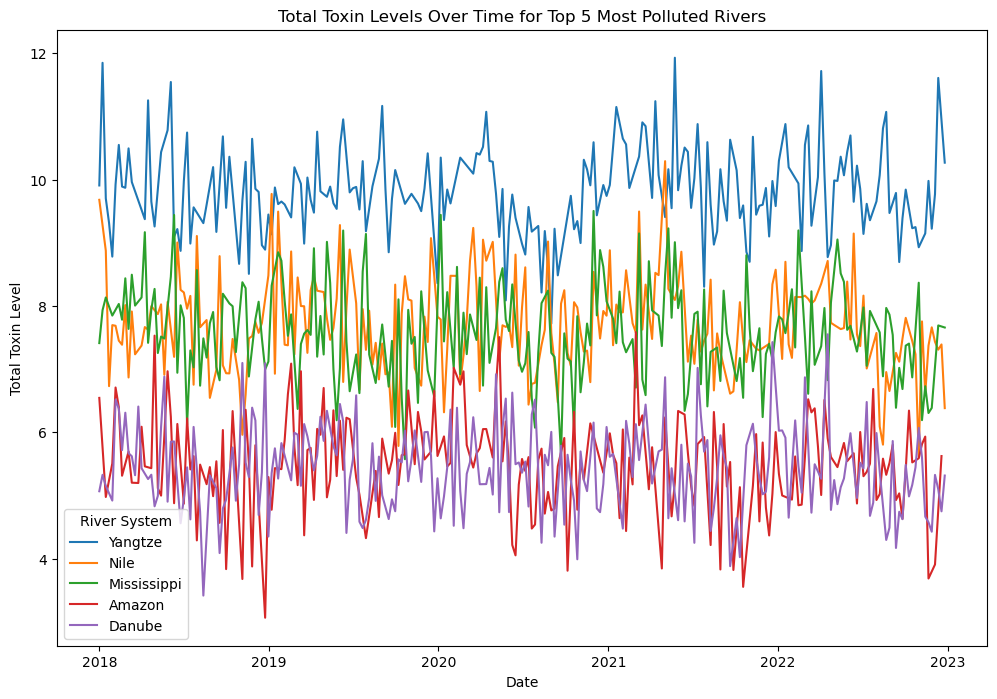

In [56]:
#Plotting a line graph of toxin levels over time for the top 5 polluted rivers
top_5_rivers = most_polluted_rivers.head(5).index

df_top_5 = df[df['River_System'].isin(top_5_rivers)]

#Grouping by Date and River_System, then calculate mean toxin levels
river_toxin_trends = df_top_5.groupby(['Date', 'River_System'])[['Lead', 'Mercury', 'Arsenic']].mean().reset_index()

#Ploting total toxin levels over time for each river
plt.figure(figsize=(12, 8))

for river in top_5_rivers:
    river_data = river_toxin_trends[river_toxin_trends['River_System'] == river]
    total_toxins = river_data[['Lead', 'Mercury', 'Arsenic']].sum(axis=1)
    plt.plot(river_data['Date'], total_toxins, label=river)

plt.title('Total Toxin Levels Over Time for Top 5 Most Polluted Rivers')
plt.xlabel('Date')
plt.ylabel('Total Toxin Level')
plt.legend(title='River System')
plt.show()


<Figure size 1000x600 with 0 Axes>

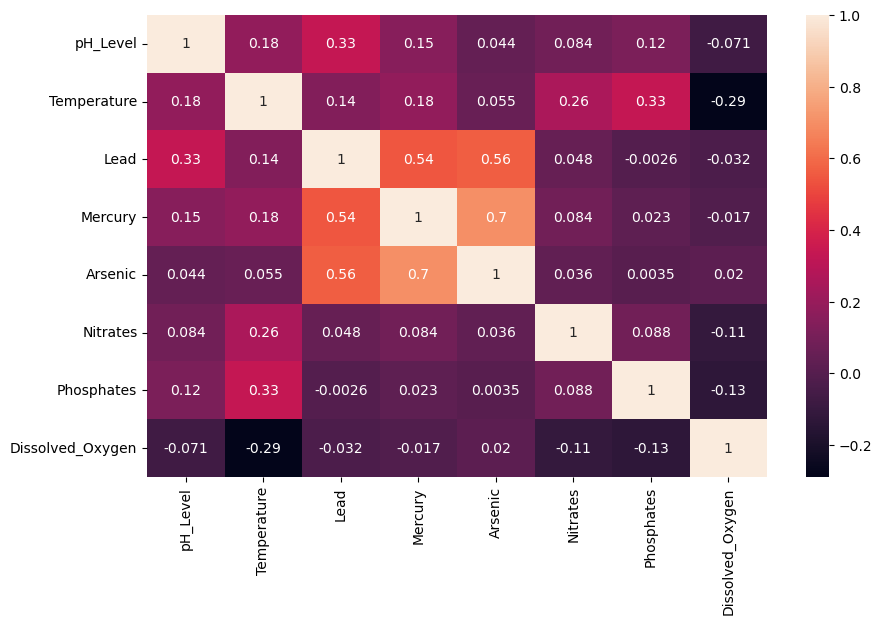

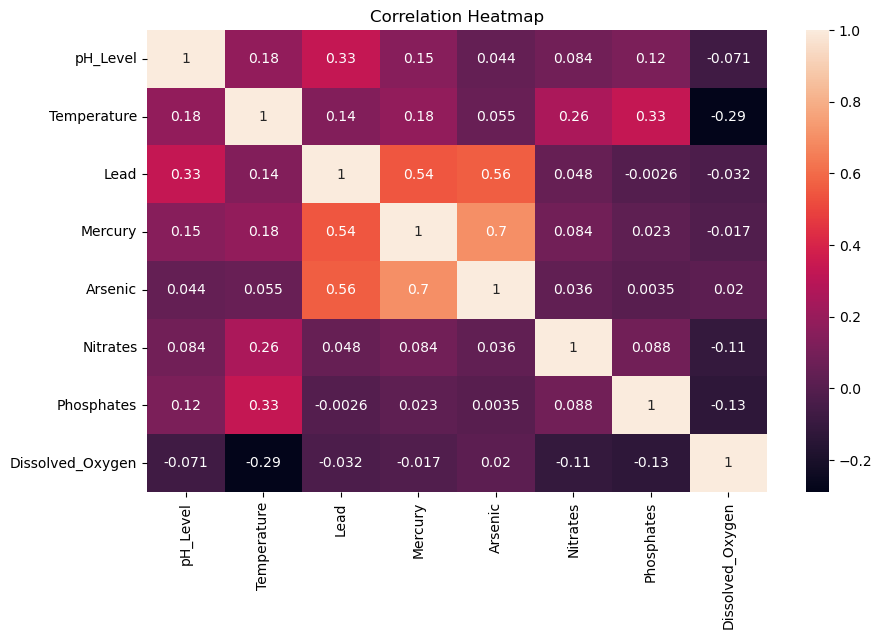

In [61]:
#Generating a heatmap of correlations between different toxins and pH levels

#Computing the correlation matrix using only numeric columns
corr_matrix = df[numeric_columns].corr()

#Plotting the heatmap for correlation between different parameters
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

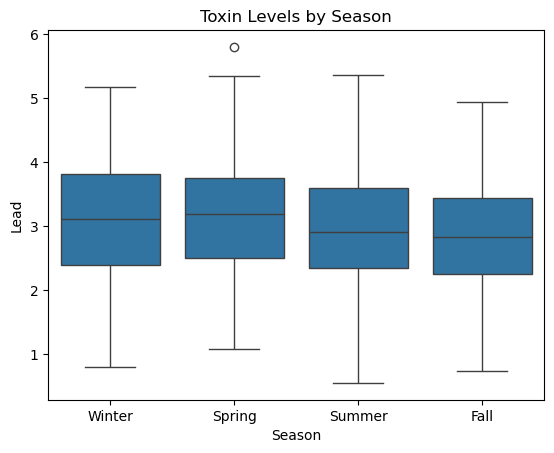

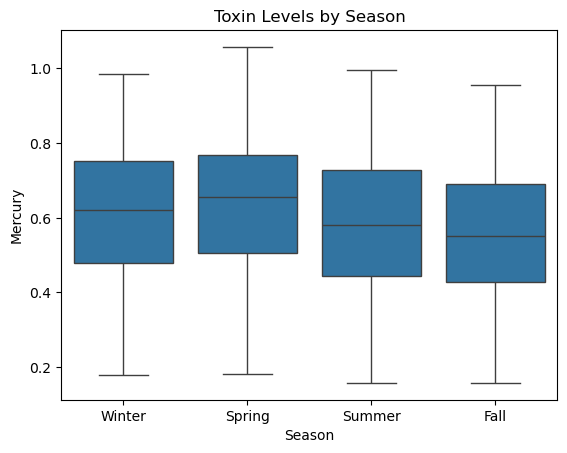

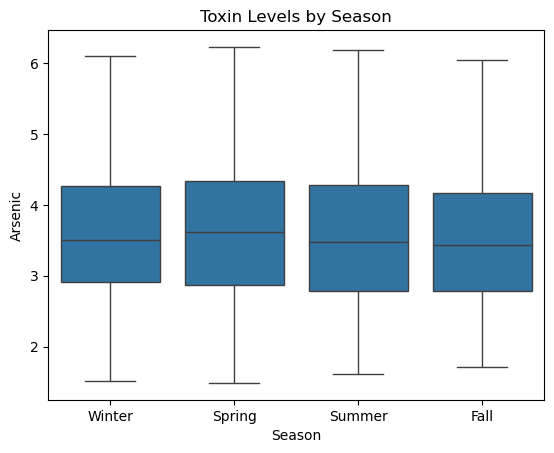

In [54]:
#Producing a box plot of toxin levels by season

#Making a season def:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].dt.month.apply(get_season)
#plotting the boxplot for lead levels
sns.boxplot(x='Season', y='Lead', data=df)
plt.title('Toxin Levels by Season')
plt.show()
#Plotting for mercury levels
sns.boxplot(x='Season', y='Mercury', data=df)
plt.title('Toxin Levels by Season')
plt.show()
#Plotting for arsenic levels 
sns.boxplot(x='Season', y='Arsenic', data=df)
plt.title('Toxin Levels by Season')
plt.show()

In [16]:
#Statistical Analysis
from scipy import stats
from sklearn.linear_model import LinearRegression
#Performing a t-test to compare toxin levels between two major river systems
Mississippi = df[df['River_System'] == 'Mississippi'][['Lead', 'Mercury', 'Arsenic']]
Yangtze = df[df['River_System'] == 'Yangtze'][['Lead', 'Mercury', 'Arsenic']]
t_stat, p_value = stats.ttest_ind(Mississippi, Yangtze)
print(f'T-test between Mississipi and Yangtze: t-statistics = {t_stat}, p-value = {p_value}')

T-test between Mississipi and Yangtze: t-statistics = [-11.33589476 -20.39339065 -31.94299508], p-value = [2.82944465e-026 2.29489088e-065 3.84418843e-116]


In [17]:
#conducting a simple linear regression to predict toxin levels based on pH

In [24]:
x = df[['pH_Level']]
y = df[['Lead', 'Mercury', 'Arsenic']]
model = LinearRegression()
model.fit(x, y)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[0.84393154]
 [0.07689291]
 [0.12683046]]
Intercept: [-3.2050222   0.03080032  2.65673373]


In [ ]:
#Insights with 4 key points:
#-Which river systems have the highest levels of toxins?:
    #As it turns out from the analysis the river Yangtze has the highes levels of toxins!
#-Are there any noticable trends in toxin levels over time?:
    #There was a big surge in Arsenic and Lead just at the beggining of 2021 suggesting some kind of event triggering this 
    #, while the Mercury levles are constantly at the same lower level.
#-How do pH levels correlate with different toxin concentrations?:
    #When the toxin levels are low the pH levels rising up, and vica versa, with the temperature playing a key factor
#-Is there a seasonal pattern to toxin levels?:
    #All toxins are showing a surge in their levels around Spring time, suggesting some kind of event triggering this.
    #Also all toxin leveles are at their lowest around Fall time.

#Summary of findings during the analysis
    #During this analysis is it clear to see the most polluted rivers are located in the most populated areas of the world,
    #these being major rivers will always be affected by pollution, which can be done by nature as well however it is mos likely to be done by human agriculture.
    #The data suggest that theres 2 season that majorly affect the pollution, by having the highes and lowest levels.
    #the highest levels are measured around spring time, this is due to the farming pollution and also the floods affecting the rivers.
    #The lovest levels are measured during fall time, where there is a lot of rain that can affect the pH level of the rivers.